### Loading packages

In [1]:
import msprime
import numpy as np
import scipy
from IPython.display import SVG
import tskit
#import allel
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import io
import ternary
import collections
import random

import matplotlib as ml
%matplotlib inline
font = {'family' : 'Sans', 'weight' : 'normal','size': 16}
ml.rc('font', **font)
ml.rcParams['figure.figsize'] = (5.0, 5.0)
ml.rcParams['text.usetex'] =False
ml.rc('font', family='serif',size=16)

### Ternary plot

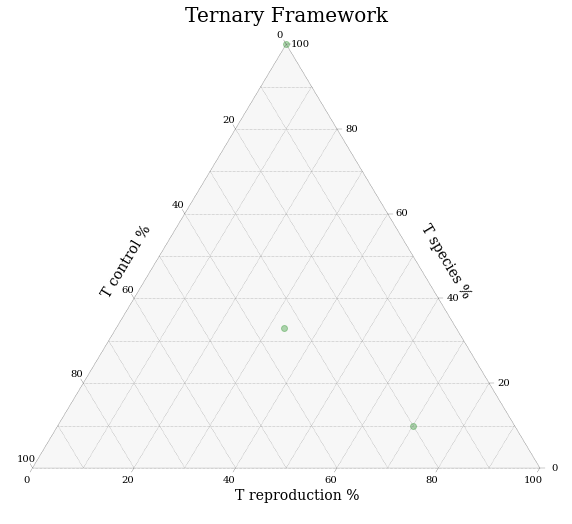

In [2]:
def tern_plot(data):
    # Set up the figure.
    fig, tax = ternary.figure(scale=100)
    fig.set_size_inches(10, 9)

    # Plot points.
    tax.scatter(data,color="green",alpha=0.3)

    # Axis labels. (See below for corner labels.)
    fontsize = 14
    offset = 0.08
    tax.left_axis_label("T control %", fontsize=fontsize, offset=offset)
    tax.right_axis_label("T species %", fontsize=fontsize, offset=offset)
    tax.bottom_axis_label("T reproduction %", fontsize=fontsize, offset=-offset)
    tax.set_title("Ternary Framework", fontsize=20)

    # Decoration.
    tax.boundary(linewidth=0.1)
    tax.gridlines(multiple=10, color="grey")
    tax.ticks(axis='lbr', linewidth=0.2, multiple=20)
    tax.get_axes().axis('off')
    
    #plt.text(-5, 60, 'Parabola $Y = x^2$', fontsize = 18)

#tax.show()

tern_plot([[33,33,33],[0,100,0],[70,10,20]])

### Basic simulation

#### Setting length to 1, estimating mutation rate

Number of mutations:  32
(3, 10)


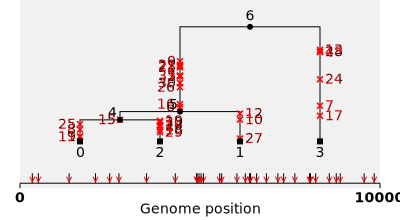

In [114]:
#Setting length to 1, estimating mutation rate

ts = msprime.sim_ancestry(2, sequence_length=10000) #, random_seed=1234)
mts = msprime.sim_mutations(ts, rate=0.0015) #, random_seed=5678)
#SVG(mts.draw_svg())

varsm=0
for var in mts.variants():
    #print(var.site.position, var.alleles, var.genotypes, sep="\t")
    varsm+=1
print("Number of mutations: ", varsm)
for t in ts.trees():
            print(t.rank())
    
SVG(mts.draw_svg(size=(400, 220)))

In [4]:
def sim_replicates(num_replicates):
    ancestry_reps = msprime.sim_ancestry(
        samples=2, sequence_length=10000,
        num_replicates=num_replicates)
    for ts in ancestry_reps:
        mutated_ts = msprime.sim_mutations(ts, rate=(1/10000))
        yield mutated_ts

In [7]:
def sim_replicates(num_replicates):
    ancestry_reps = msprime.sim_ancestry(
        samples=2, sequence_length=10000,
        num_replicates=num_replicates)
    for ts in ancestry_reps:
        mutated_ts = msprime.sim_mutations(ts, rate=(1/10000))
        for t in ts.trees():
            print(t.rank())
        #yield mutated_ts

In [9]:
sim_replicates(7)

(4, 0)
(3, 5)
(3, 5)
(3, 7)
(3, 6)
(3, 2)
(3, 5)


### Summarizing topologies

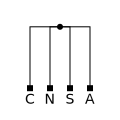

(0, 0)


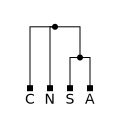

(1, 0)


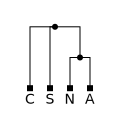

(1, 1)


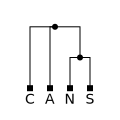

(1, 2)


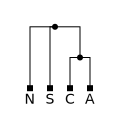

(1, 3)


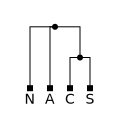

(1, 4)


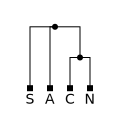

(1, 5)


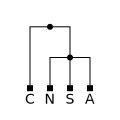

(2, 0)


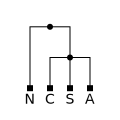

(2, 1)


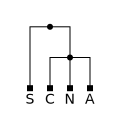

(2, 2)


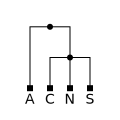

(2, 3)


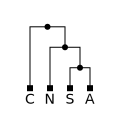

(3, 0)


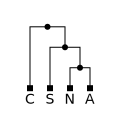

(3, 1)


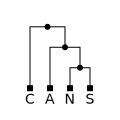

(3, 2)


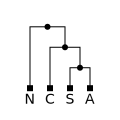

(3, 3)


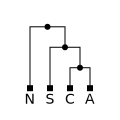

(3, 4)


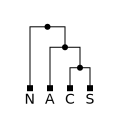

(3, 5)


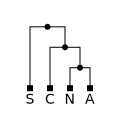

(3, 6)


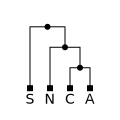

(3, 7)


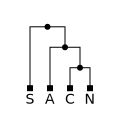

(3, 8)


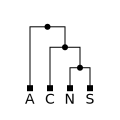

(3, 9)


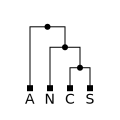

(3, 10)


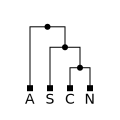

(3, 11)


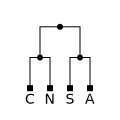

(4, 0)


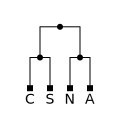

(4, 1)


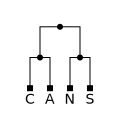

(4, 2)


In [10]:
#Visualizing topologies
for t in tskit.all_trees(num_leaves=4):
    display(SVG(t.draw_svg(node_labels={0: "C", 1: "N", 2: "S",3:"A"}, order="tree", size=(120, 120))))
    print(t.rank())

In [ ]:
#Counter({(4, 2): 1087,
#         (3, 2): 516,
#         (4, 0): 1087,
#         (4, 1): 1126,
#         (3, 11): 542,
#         (3, 10): 563,
#         (3, 8): 560,
#         (3, 0): 554,
#         (3, 9): 582,
#         (3, 6): 553,
#         (3, 3): 559,
#         (3, 7): 554,
#         (3, 5): 569,
#         (3, 1): 584,
#         (3, 4): 564})

Topology r
Visualizing rank (3, 2)


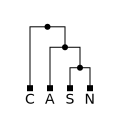

Visualizing rank (3, 4)


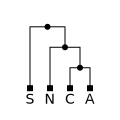

Visualizing rank (3, 9)


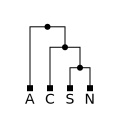

Visualizing rank (3, 7)


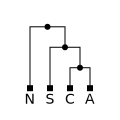

Visualizing rank (4, 2)


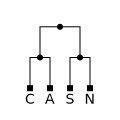

In [11]:
print("Topology r")
for rank in [(3,2), (3, 4), (3, 9),(3,7), (4, 2)]:
    t = tskit.Tree.unrank(num_leaves=4, rank=rank)
    print("Visualizing rank", rank)
    display(SVG(t.draw_svg(node_labels={0: "C", 1: "S", 2: "N", 3 : "A"}, order="tree", size=(120, 120))))

Topology c
Visualizing rank (4, 1)


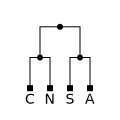

Visualizing rank (3, 10)


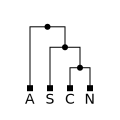

Visualizing rank (3, 6)


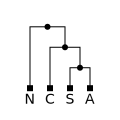

Visualizing rank (3, 5)


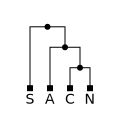

Visualizing rank (3, 1)


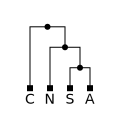

In [135]:
print("Topology c")
for rank in [(4,1), (3, 10), (3, 6),(3,5), (3, 1)]:
    t = tskit.Tree.unrank(num_leaves=4, rank=rank)
    print("Visualizing rank", rank)
    display(SVG(t.draw_svg(node_labels={0: "C", 1: "S", 2: "N", 3 : "A"}, order="tree", size=(120, 120))))

Topology s
Visualizing rank (4, 0)


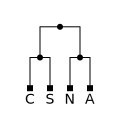

Visualizing rank (3, 11)


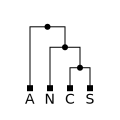

Visualizing rank (3, 8)


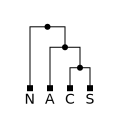

Visualizing rank (3, 0)


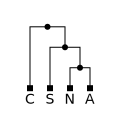

Visualizing rank (3, 3)


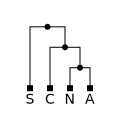

In [136]:
print("Topology s")
for rank in [(4,0), (3, 11), (3, 8),(3,0), (3, 3)]:
    t = tskit.Tree.unrank(num_leaves=4, rank=rank)
    print("Visualizing rank", rank)
    display(SVG(t.draw_svg(node_labels={0: "C", 1: "S", 2: "N", 3 : "A"}, order="tree", size=(120, 120))))

#### Function: produce ranks

In [18]:
def produce_ranks(ts_reps):
    ranks=[]
    for replicate_index, ts in enumerate(ts_reps):
        for t in ts.trees():
            ranks+=[t.rank()]
        
    return ranks
    
produce_ranks(sim_null_model(50))

[(3, 11),
 (3, 10),
 (4, 1),
 (4, 1),
 (3, 3),
 (4, 0),
 (3, 9),
 (3, 3),
 (4, 0),
 (4, 0),
 (3, 11),
 (3, 2),
 (3, 3),
 (3, 10),
 (3, 1),
 (4, 1),
 (4, 2),
 (4, 0),
 (4, 0),
 (4, 0),
 (3, 0),
 (3, 8),
 (3, 9),
 (4, 1),
 (3, 4),
 (3, 11),
 (3, 5),
 (3, 5),
 (3, 6),
 (3, 11),
 (4, 1),
 (3, 10),
 (3, 8),
 (3, 10),
 (4, 2),
 (4, 0),
 (4, 2),
 (3, 5),
 (3, 9),
 (3, 11),
 (3, 9),
 (3, 11),
 (3, 7),
 (3, 2),
 (3, 8),
 (3, 11),
 (3, 9),
 (4, 1),
 (4, 0),
 (4, 0)]

In [19]:
produce_ranks(sim_null_model(10))

[(3, 3),
 (4, 2),
 (4, 1),
 (4, 2),
 (3, 6),
 (4, 2),
 (3, 11),
 (4, 0),
 (3, 11),
 (3, 10)]

In [30]:
ranks_sample=produce_ranks(sim_null_model(n_subtrees))

In [33]:
rank_dict=collections.Counter(produce_ranks(sim_null_model(n_subtrees)))

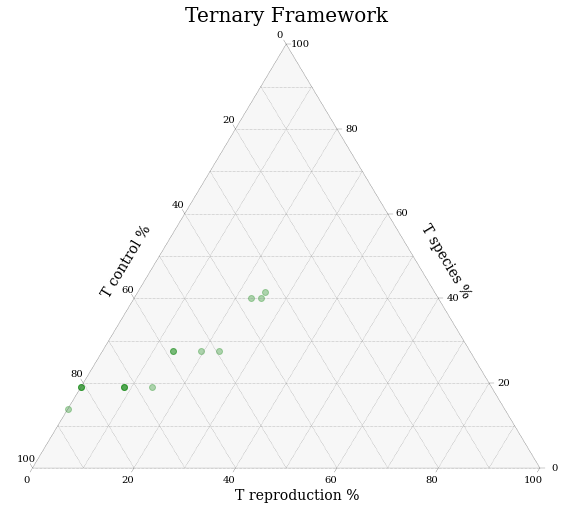

In [34]:
topo_weight=[]
topS_count = []
topC_count = []
topR_count = []

rank_dict=collections.Counter(ranks_sample)
    
for key, value in rank_dict.items():
        #print(key, value)
    if key == (4,0) or key == (3,11) or key == (3,8) or key == (3,0) or key == (3,3):
            #print("yay")#TOPOLOGY S
            #print(key)
        topS_count.append(value)
        #TOPOLOGY S
    elif key == (4,1) or key == (3, 10) or key ==(3, 6) or key == (3,5) or key == (3, 1):
        topC_count.append(value)
        # TOPOLOGY C
    else:
        #key == (3,2) or key == (3, 4) or key == (3, 9) or key == (3,7) or key == (4, 2):
        topR_count.append(value)
        # TOPOLOGY R

    #one_value=[(sum(topS_count)),sum(topC_count),sum(topR_count)]
    #print(sum(topS_count), sum(topC_count),sum(topR_count))
    #one_value=[(sum(topS_count)/n_subtrees),sum(topC_count)/n_subtrees,sum(topR_count)/n_subtrees]
    #print((sum(topS_count)/n_subtrees)*100, sum(topC_count)/n_subtrees*100, sum(topR_count)/n_subtrees*100)
    one_value=[(sum(topR_count)/n_subtrees)*100, sum(topS_count)/n_subtrees*100, sum(topC_count)/n_subtrees*100]
    #print(one_value)
    topo_weight.append(one_value)
    
tern_plot(topo_weight)

### Null model analysis

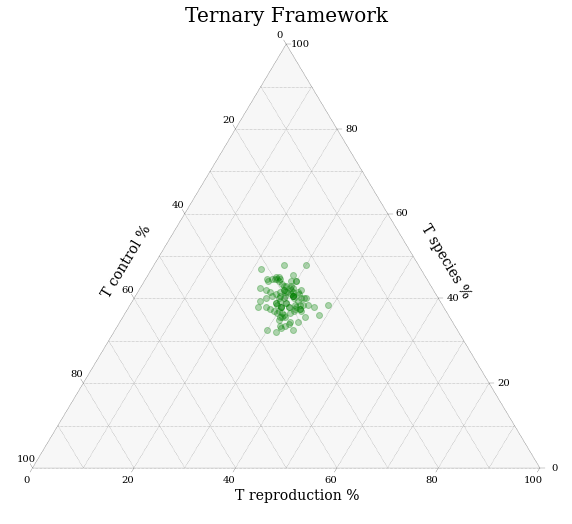

In [31]:
run_name="t5_t10_t20"
n_subtrees=200
topo_weight=[]
for _ in range(100):
    topS_count = []
    topC_count = []
    topR_count = []
    rank_dict=collections.Counter(produce_ranks(sim_null_model_flex(n_subtrees,10,20,1000
                                                                   )))
    for key, value in rank_dict.items():
        #print(key, value)
        if key == (4,0) or key == (3,11) or \
            key == (3,8) or key == (3,0) or key == (3,3):
            #print("yay")#TOPOLOGY S
            #print(key)
            topS_count.append(value)
        #TOPOLOGY S
        elif key == (4,1) or key == (3, 10) or key ==(3, 6) or key == (3,5) or key == (3, 1):
            topC_count.append(value)
        # TOPOLOGY C
        else:
        #key == (3,2) or key == (3, 4) or key == (3, 9) or key == (3,7) or key == (4, 2):
            topR_count.append(value)
        # TOPOLOGY R

    #one_value=[(sum(topS_count)),sum(topC_count),sum(topR_count)]
    #print(sum(topS_count), sum(topC_count),sum(topR_count))
    #one_value=[(sum(topS_count)/n_subtrees),sum(topC_count)/n_subtrees,sum(topR_count)/n_subtrees]
    #print((sum(topS_count)/n_subtrees)*100, sum(topC_count)/n_subtrees*100, sum(topR_count)/n_subtrees*100)
    one_value=[(sum(topR_count)/n_subtrees)*100, sum(topS_count)/n_subtrees*100, sum(topC_count)/n_subtrees*100]
    #print(one_value)
    topo_weight.append(one_value)
tern_plot(topo_weight)
#plt.savefig("/Users/dshipilina/GitHub/LittorinaBrooding/null_"+run_name+".pdf",bbox_inches="tight")

### Visualizing split time differences

t10_t20_t120


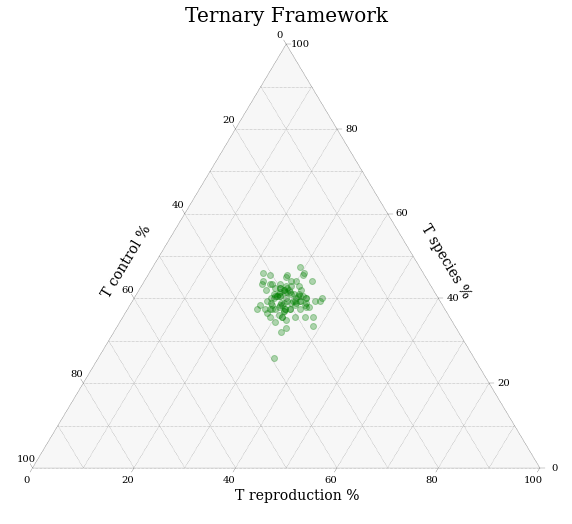

In [39]:
t12=10
t23=20
t34=120

run_name="t"+str(t12)+"_t"+str(t23)+"_t"+str(t34)
print(run_name)
n_subtrees=200
topo_weight=[]
for _ in range(100):
    topS_count = []
    topC_count = []
    topR_count = []
    rank_dict=collections.Counter(produce_ranks(sim_null_model_flex(n_subtrees,t12,t23,t34)))
    for key, value in rank_dict.items():
        #print(key, value)
        if key == (4,0) or key == (3,11) or \
            key == (3,8) or key == (3,0) or key == (3,3):
            #print("yay")#TOPOLOGY S
            #print(key)
            topS_count.append(value)
        #TOPOLOGY S
        elif key == (4,1) or key == (3, 10) or key ==(3, 6) or key == (3,5) or key == (3, 1):
            topC_count.append(value)
        # TOPOLOGY C
        else:
        #key == (3,2) or key == (3, 4) or key == (3, 9) or key == (3,7) or key == (4, 2):
            topR_count.append(value)
        # TOPOLOGY R
        
    one_value=[(sum(topR_count)/n_subtrees)*100, sum(topS_count)/n_subtrees*100, sum(topC_count)/n_subtrees*100]
    topo_weight.append(one_value)
    
    
tern_plot(topo_weight)
plt.savefig("/Users/dshipilina/GitHub/LittorinaBrooding/null_"+run_name+".pdf",bbox_inches="tight")

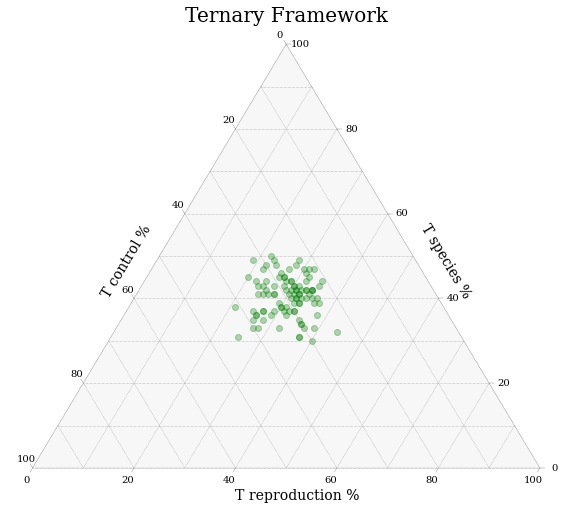

In [35]:
n_subtrees=100
topo_weight=[]

for _ in range(100):
    topS_count = []
    topC_count = []
    topR_count = []
    rank_dict=collections.Counter(produce_ranks(sim_null_model(n_subtrees)))
    for key, value in rank_dict.items():
        #print(key, value)
        if key == (4,0) or key == (3,11) or \
            key == (3,8) or key == (3,0) or key == (3,3):
            topS_count.append(value)
        #TOPOLOGY S
        elif key == (4,1) or key == (3, 10) or key ==(3, 6) or key == (3,5) or key == (3, 1):
            topC_count.append(value)
        # TOPOLOGY C
        else:
            topR_count.append(value)
        # TOPOLOGY R

    #one_value=[(sum(topS_count)),sum(topC_count),sum(topR_count)]
    #print(sum(topS_count), sum(topC_count),sum(topR_count))
    #one_value=[(sum(topS_count)/n_subtrees),sum(topC_count)/n_subtrees,sum(topR_count)/n_subtrees]
    #print((sum(topS_count)/n_subtrees)*100, sum(topC_count)/n_subtrees*100, sum(topR_count)/n_subtrees*100)
    one_value=[(sum(topR_count)/n_subtrees)*100, sum(topS_count)/n_subtrees*100, sum(topC_count)/n_subtrees*100]
    #print(one_value)
    topo_weight.append(one_value)
tern_plot(topo_weight)

#### Testing null model functions

In [17]:
n_subtrees=100
topo_weight=[]
for _ in range(100):
    topS_count = []
    topC_count = []
    topR_count = []
    rank_dict=collections.Counter(produce_ranks(sim_null_model(n_subtrees)))
    for key, value in rank_dict.items():
        #print(key, value)
        if key == (4,0) or key == (3,11) or \
            key == (3,8) or key == (3,0) or key == (3,3):
            #print("yay")#TOPOLOGY S
            #print(key)
            topS_count.append(value)
        #TOPOLOGY S
        elif key == (4,1) or key == (3, 10) or key ==(3, 6) or key == (3,5) or key == (3, 1):
            topC_count.append(value)
        # TOPOLOGY C
        else:
        #key == (3,2) or key == (3, 4) or key == (3, 9) or key == (3,7) or key == (4, 2):
            topR_count.append(value)
        # TOPOLOGY R

    #one_value=[(sum(topS_count)),sum(topC_count),sum(topR_count)]
    #print(sum(topS_count), sum(topC_count),sum(topR_count))
    #one_value=[(sum(topS_count)/n_subtrees),sum(topC_count)/n_subtrees,sum(topR_count)/n_subtrees]
    #print((sum(topS_count)/n_subtrees)*100, sum(topC_count)/n_subtrees*100, sum(topR_count)/n_subtrees*100)
    one_value=[(sum(topR_count)/n_subtrees)*100, sum(topS_count)/n_subtrees*100, sum(topC_count)/n_subtrees*100]
    #print(one_value)
    topo_weight.append(one_value)
tern_plot(topo_weight)

NameError: name 'produce_ranks' is not defined

In [12]:
# L/O

In [33]:
collections.Counter(produce_ranks(sim_null_model(10)))

Counter({(3, 5): 1,
         (3, 11): 4,
         (3, 2): 1,
         (4, 2): 1,
         (3, 10): 1,
         (3, 8): 1,
         (3, 9): 1})

In [132]:
num_replicates = 100000
#ranks = np.zeros(num_replicates)
ranks=[]
for replicate_index, ts in enumerate(sim_replicates(num_replicates)):
    for t in ts.trees():
        #print(t.rank())
        ranks+=[t.rank()]
        
print(ranks)

[(3, 4), (3, 9), (3, 3), (4, 2), (3, 8), (4, 0), (3, 2), (3, 10), (3, 6), (3, 5), (3, 10), (3, 10), (4, 1), (3, 8), (4, 0), (3, 10), (3, 2), (3, 9), (3, 4), (4, 1), (4, 0), (4, 1), (3, 9), (3, 4), (3, 10), (4, 1), (4, 2), (3, 0), (4, 1), (3, 10), (3, 9), (4, 2), (3, 8), (3, 10), (3, 8), (3, 11), (3, 5), (3, 2), (3, 1), (3, 0), (3, 7), (3, 0), (3, 1), (3, 2), (3, 8), (3, 0), (3, 0), (4, 0), (4, 0), (4, 2), (4, 2), (3, 0), (3, 7), (4, 1), (3, 6), (4, 0), (3, 11), (3, 3), (3, 7), (3, 1), (3, 6), (3, 2), (3, 0), (4, 0), (4, 0), (3, 3), (3, 4), (3, 1), (4, 2), (4, 0), (4, 1), (3, 3), (3, 7), (3, 7), (3, 10), (3, 1), (3, 7), (3, 8), (4, 2), (3, 5), (3, 9), (3, 8), (3, 6), (3, 7), (4, 1), (4, 1), (3, 9), (3, 5), (4, 0), (4, 1), (3, 4), (3, 0), (3, 7), (3, 3), (4, 2), (4, 1), (3, 10), (4, 2), (4, 1), (4, 2), (3, 8), (3, 9), (3, 7), (3, 0), (3, 9), (3, 1), (4, 0), (3, 3), (4, 1), (3, 5), (3, 1), (3, 6), (4, 2), (3, 5), (3, 7), (3, 2), (3, 11), (3, 7), (3, 8), (3, 7), (3, 9), (3, 8), (4, 2), (3,

In [147]:
#Summarize Topology s
#for rank in [(4,0), (3, 11), (3, 8),(3,0), (3, 3)]:
collections.Counter(ranks)[(3, 4)][(3, 8)]

TypeError: 'int' object is not subscriptable

In [171]:
ranks[1:10]

[(3, 9), (3, 3), (4, 2), (3, 8), (4, 0), (3, 2), (3, 10), (3, 6), (3, 5)]

In [ ]:
from itertools import chain, islice

def ichunked(seq, chunksize):
    """Yields items from an iterator in iterable chunks."""
    it = iter(seq)
    while True:
        yield chain([it.next()], islice(it, chunksize-1))

def chunked(seq, chunksize):
    """Yields items from an iterator in list chunks."""
    for chunk in ichunked(seq, chunksize):
        yield list(chunk)

In [187]:
#rank_dict=collections.Counter(ranks[0:10000])
n_subtrees=100
rank_dict=collections.Counter(random.sample(ranks, n_subtrees))
#name = "ABC"
topS_count = []
topC_count = []
topR_count = []
#(4,0),(3, 11),(3, 8),(3,0),(3, 3)]
#for character in name:
for key, value in rank_dict.items():
    print(key, value)
    if key == (4,0) or key == (3,11) or \
        key == (3,8) or key == (3,0) or key == (3,3):    #TOPOLOGY S
        topS_count.append(value)
        #TOPOLOGY S
    elif key == (4,1) or key == (3, 10) or key ==(3, 6) or key == (3,5) or key == (3, 1):
        topC_count.append(value)
        # TOPOLOGY C
    else:
        #key == (3,2) or key == (3, 4) or key == (3, 9) or key == (3,7) or key == (4, 2):
        topR_count.append(value)
        # TOPOLOGY R
#sum(values)

print(topS_count, topC_count, topR_count)
print(sum(topS_count), sum(topC_count), sum(topR_count))
print(sum(topS_count) + sum(topC_count) + sum(topR_count))

one_value=[(sum(topS_count)/n_subtrees),sum(topC_count)/n_subtrees,sum(topR_count)/n_subtrees]
print([(sum(topS_count)/n_subtrees),sum(topC_count)/n_subtrees,sum(topR_count)/n_subtrees])

(4, 2) 9
(3, 0) 7
(3, 5) 4
(4, 0) 14
(4, 1) 12
(3, 8) 7
(3, 7) 8
(3, 2) 5
(3, 9) 4
(3, 3) 5
(3, 1) 8
(3, 6) 6
(3, 10) 5
(3, 4) 2
(3, 11) 4
[7, 14, 7, 5, 4] [4, 12, 8, 6, 5] [9, 8, 5, 4, 2]
37 35 28
100
[0.37, 0.35, 0.28]


In [15]:
#rank_dict=collections.Counter(ranks[0:10000])
n_subtrees=100
topo_weight=[]
for _ in range(1000):
    topS_count = []
    topC_count = []
    topR_count = []
    rank_dict=collections.Counter(random.sample(ranks, n_subtrees))
#(4,0),(3, 11),(3, 8),(3,0),(3, 3)]
#for character in name:
    for key, value in rank_dict.items():
        #print(key, value)
        if key == (4,0) or key == (3,11) or \
            key == (3,8) or key == (3,0) or key == (3,3):    #TOPOLOGY S
            topS_count.append(value)
        #TOPOLOGY S
        elif key == (4,1) or key == (3, 10) or key ==(3, 6) or key == (3,5) or key == (3, 1):
            topC_count.append(value)
        # TOPOLOGY C
        else:
        #key == (3,2) or key == (3, 4) or key == (3, 9) or key == (3,7) or key == (4, 2):
            topR_count.append(value)
        # TOPOLOGY R

    one_value=[(sum(topS_count)),sum(topC_count),sum(topR_count)]
    print(one_value)
    topo_weight.append(one_value)
    tern_plot(topo_weight)

NameError: name 'ranks' is not defined

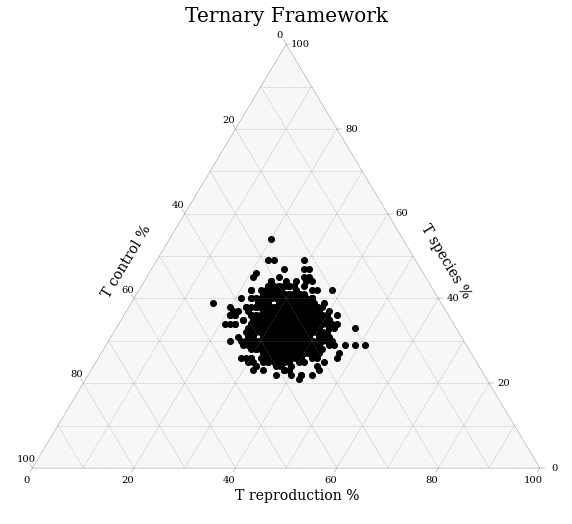

In [205]:
tern_plot(topo_weight)

In [ ]:
rank_dict=collections.Counter(ranks)

#name = "ABC"
topS_count = []
topC_count = []
topR_count = []
#(4,0),(3, 11),(3, 8),(3,0),(3, 3)]
#for character in name:
for key, value in rank_dict.items():
    print(key, value)
    if key == (4,0) or key == (3,11) or \
        key == (3,8) or key == (3,0) or key == (3,3):    #TOPOLOGY S
        topS_count.append(value)
        #TOPOLOGY S
    elif key == (4,1) or key == (3, 10) or key ==(3, 6) or key == (3,5) or key == (3, 1):
        topC_count.append(value)
        # TOPOLOGY C
    else:
        #key == (3,2) or key == (3, 4) or key == (3, 9) or key == (3,7) or key == (4, 2):
        topR_count.append(value)
        # TOPOLOGY R
#sum(values)

print(topS_count, topC_count, topR_count)
print(sum(topS_count), sum(topC_count), sum(topR_count))
print(sum(topS_count) + sum(topC_count) + sum(topR_count))

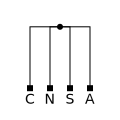

(0, 0)


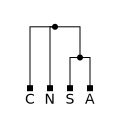

(1, 0)


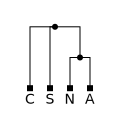

(1, 1)


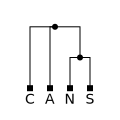

(1, 2)


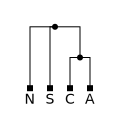

(1, 3)


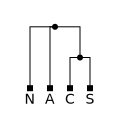

(1, 4)


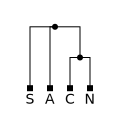

(1, 5)


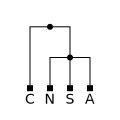

(2, 0)


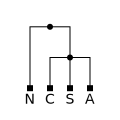

(2, 1)


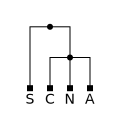

(2, 2)


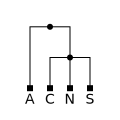

(2, 3)


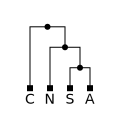

(3, 0)


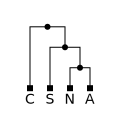

(3, 1)


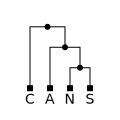

(3, 2)


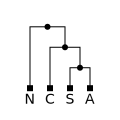

(3, 3)


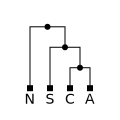

(3, 4)


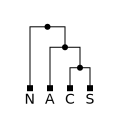

(3, 5)


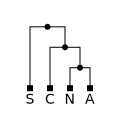

(3, 6)


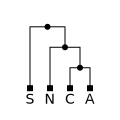

(3, 7)


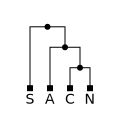

(3, 8)


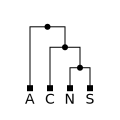

(3, 9)


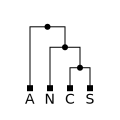

(3, 10)


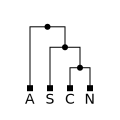

(3, 11)


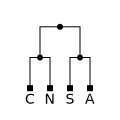

(4, 0)


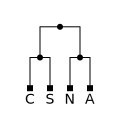

(4, 1)


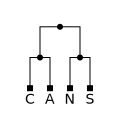

(4, 2)


In [8]:
for t in tskit.all_trees(num_leaves=4):
    display(SVG(t.draw_svg(node_labels={0: "C", 1: "N", 2: "S",3:"A"}, order="tree", size=(120, 120))))
    print(t.rank())

### Demographic model: neutral

In [4]:
demography = msprime.Demography()
demography.add_population(name="A", initial_size=1000)
demography.add_population(name="B", initial_size=1000)
demography.add_population(name="C", initial_size=2000)
demography.add_population(name="C", initial_size=2000)
demography.add_population_split(time=1000, derived=["A", "B"], ancestral="C")
demography.debug()
ts = msprime.sim_ancestry(samples={"A": 1, "B": 1}, demography=demography, random_seed=12)
ts

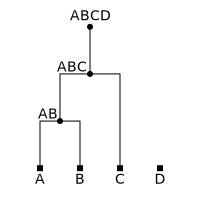

In [12]:
import tskit

tables = tskit.TableCollection(1)
for _ in range(4):
    tables.nodes.add_row(flags=tskit.NODE_IS_SAMPLE)
AB = tables.nodes.add_row(time=10)
ABC = tables.nodes.add_row(time=20)
ABCD = tables.nodes.add_row(time=30)
tables.edges.add_row(0, 1, AB, 0)
tables.edges.add_row(0, 1, AB, 1)
tables.edges.add_row(0, 1, ABC, 2)
tables.edges.add_row(0, 1, ABC, AB)
tables.edges.add_row(0, 1, ABCD, ABC)
#tables.edges.add_row(0, 1, ABCD, AB)
tables.sort()

tree = tables.tree_sequence().first()
SVG(tree.draw_svg(node_labels={0:"A", 1:"B", 2:"C", 3:"D", 4:"AB", 5:"ABC",6:"ABCD"}))

In [13]:
demography = msprime.Demography()
demography.add_population(name="A", initial_size=100)
demography.add_population(name="B", initial_size=100)
demography.add_population(name="C", initial_size=100)
demography.add_population(name="D", initial_size=100)
demography.add_population(name="AB", initial_size=100)
demography.add_population(name="ABC", initial_size=100)
demography.add_population(name="ABCD", initial_size=100)
demography.add_population_split(time=10, derived=["A", "B"], ancestral="AB")
demography.add_population_split(time=200, derived=["AB", "C"], ancestral="ABC")
demography.add_population_split(time=3000, derived=["ABC", "D"], ancestral="ABCD")
demography.debug()

In [ ]:
def sim_replicates_null(num_replicates):
    ancestry_reps = msprime.sim_ancestry(
        samples=2, sequence_length=10000, demography=demography,       
        num_replicates=num_replicates)
    for ts in ancestry_reps:
        mutated_ts = msprime.sim_mutations(ts, rate=(1/10000))
        yield mutated_ts

In [16]:
def sim_test_null_model(num_replicates):
    demography = msprime.Demography()
    demography.add_population(name="A", initial_size=100)
    demography.add_population(name="B", initial_size=100)
    demography.add_population(name="C", initial_size=100)
    demography.add_population(name="D", initial_size=100)
    demography.add_population(name="AB", initial_size=100)
    demography.add_population(name="ABC", initial_size=100)
    demography.add_population(name="ABCD", initial_size=100)
    demography.add_population_split(time=10, derived=["A", "B"], ancestral="AB")
    demography.add_population_split(time=20, derived=["AB", "C"], ancestral="ABC")
    demography.add_population_split(time=30, derived=["ABC", "D"], ancestral="ABCD")
    #ancestry_reps = msprime.sim_ancestry(samples={"A": 1, "B": 1, "C": 1, "D": 1}, sequence_length=10000, demography=demography, num_replicates=num_replicates)
    ancestry_reps = msprime.sim_ancestry(samples={"A": 1, "B": 1, "C": 1, "D": 1}, 
                                         demography=demography, sequence_length=10000,
                                         num_replicates=num_replicates, ploidy=1)
    for ts in ancestry_reps:
        mutated_ts = msprime.sim_mutations(ts, rate=(1/10000))
        for t in ts.trees():
            print(t.rank())
            #display(SVG(t.draw_svg(node_labels={0: "A", 1: "B", 2: "C", 3 : "D"}, order="tree", size=(120, 120))))
    #yield ts
            
sim_test_null_model(50)

(4, 1)
(4, 0)
(3, 10)
(3, 4)
(4, 2)
(3, 7)
(3, 2)
(4, 2)
(3, 11)
(3, 9)
(3, 8)
(4, 0)
(4, 0)
(3, 3)
(3, 9)
(3, 10)
(3, 1)
(4, 2)
(3, 3)
(4, 1)
(4, 2)
(4, 0)
(3, 11)
(3, 0)
(3, 10)
(3, 2)
(4, 2)
(4, 0)
(3, 2)
(3, 7)
(3, 4)
(4, 2)
(4, 2)
(4, 0)
(3, 2)
(4, 2)
(3, 7)
(3, 1)
(4, 0)
(4, 1)
(3, 11)
(3, 10)
(3, 0)
(4, 2)
(3, 11)
(3, 6)
(4, 1)
(4, 1)
(3, 9)
(3, 10)


In [14]:
def sim_null_model(num_replicates):
    demography = msprime.Demography()
    demography.add_population(name="A", initial_size=100)
    demography.add_population(name="B", initial_size=100)
    demography.add_population(name="C", initial_size=100)
    demography.add_population(name="D", initial_size=100)
    demography.add_population(name="AB", initial_size=100)
    demography.add_population(name="ABC", initial_size=100)
    demography.add_population(name="ABCD", initial_size=100)
    demography.add_population_split(time=10, derived=["A", "B"], ancestral="AB")
    demography.add_population_split(time=20, derived=["AB", "C"], ancestral="ABC")
    demography.add_population_split(time=30, derived=["ABC", "D"], ancestral="ABCD")
    #ancestry_reps = msprime.sim_ancestry(samples={"A": 1, "B": 1, "C": 1, "D": 1}, sequence_length=10000, demography=demography, num_replicates=num_replicates)
    ancestry_reps = msprime.sim_ancestry(samples={"A": 1, "B": 1, "C": 1, "D": 1}, 
                                         demography=demography, sequence_length=10000,
                                         num_replicates=num_replicates, ploidy=1)
    for ts in ancestry_reps:
        mutated_ts = msprime.sim_mutations(ts, rate=(1/10000))
        yield ts
        
sim_null_model(50)

<generator object sim_null_model at 0x158a09430>

In [21]:
def sim_null_model_flex(num_replicates,t12,t23,t34):
    demography = msprime.Demography()
    demography.add_population(name="A", initial_size=100)
    demography.add_population(name="B", initial_size=100)
    demography.add_population(name="C", initial_size=100)
    demography.add_population(name="D", initial_size=100)
    demography.add_population(name="AB", initial_size=100)
    demography.add_population(name="ABC", initial_size=100)
    demography.add_population(name="ABCD", initial_size=100)
    demography.add_population_split(time=t12, derived=["A", "B"], ancestral="AB")
    demography.add_population_split(time=t23, derived=["AB", "C"], ancestral="ABC")
    demography.add_population_split(time=t34, derived=["ABC", "D"], ancestral="ABCD")
    #ancestry_reps = msprime.sim_ancestry(samples={"A": 1, "B": 1, "C": 1, "D": 1}, sequence_length=10000, demography=demography, num_replicates=num_replicates)
    ancestry_reps = msprime.sim_ancestry(samples={"A": 1, "B": 1, "C": 1, "D": 1}, 
                                         demography=demography, sequence_length=10000,
                                         num_replicates=num_replicates, ploidy=1)
    for ts in ancestry_reps:
        mutated_ts = msprime.sim_mutations(ts, rate=(1/10000))
        yield ts
        
sim_null_model(50)

<generator object sim_null_model at 0x1589f2580>

(3, 10)


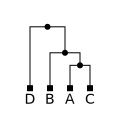

In [80]:
demography = msprime.Demography()
demography.add_population(name="A", initial_size=100)
demography.add_population(name="B", initial_size=100)
demography.add_population(name="C", initial_size=100)
demography.add_population(name="D", initial_size=100)
demography.add_population(name="AB", initial_size=100)
demography.add_population(name="ABC", initial_size=100)
demography.add_population(name="ABCD", initial_size=100)
demography.add_population_split(time=10, derived=["A", "B"], ancestral="AB")
demography.add_population_split(time=20, derived=["AB", "C"], ancestral="ABC")
demography.add_population_split(time=30, derived=["ABC", "D"], ancestral="ABCD")
    #ancestry_reps = msprime.sim_ancestry(samples={"A": 1, "B": 1, "C": 1, "D": 1}, sequence_length=10000, demography=demography, num_replicates=num_replicates)
ts = msprime.sim_ancestry(samples={"A": 1, "B": 1, "C": 1, "D": 1}, demography=demography, ploidy=1) #, random_seed=12)
ts
for t in ts.trees():
    print(t.rank())
    display(SVG(t.draw_svg(node_labels={0: "A", 1: "B", 2: "C", 3 : "D"}, order="tree", size=(120, 120))))
#print("Topology s")
#for rank in [(243,1767)]:
#    t = tskit.Tree.unrank(num_leaves=8, rank=rank)
#    print("Visualizing rank", rank)
#    display(SVG(t.draw_svg(node_labels={0: "C", 1: "S", 2: "N", 3 : "A"}, order="tree", size=(120, 120))))

In [15]:
sim_null_model(1)
for t in sim_null_model(1).trees():
    print(t.rank())

AttributeError: 'generator' object has no attribute 'trees'

In [10]:
#demography = msprime.Demography.isolated_model([100] * 4)

In [12]:
print(demography)

Demography
╟  Populations
║  ┌────────────────────────────────────────────────────────────────────────────────────────────────┐
║  │ id │name   │description  │initial_size  │ growth_rate │  default_sampling_time│extra_metadata  │
║  ├────────────────────────────────────────────────────────────────────────────────────────────────┤
║  │ 0  │pop_0  │             │100.0         │      0      │                      0│{}              │
║  │ 1  │pop_1  │             │100.0         │      0      │                      0│{}              │
║  │ 2  │pop_2  │             │100.0         │      0      │                      0│{}              │
║  │ 3  │pop_3  │             │100.0         │      0      │                      0│{}              │
║  └────────────────────────────────────────────────────────────────────────────────────────────────┘
╟  Migration Matrix
║  ┌───────────────────────────────────────┐
║  │       │ pop_0 │ pop_1 │ pop_2 │ pop_3 │
║  ├───────────────────────────────────────┤
║  

In [11]:
demography.debug()

,start,end,growth_rate,pop_0,pop_1,pop_2,pop_3
pop_0,100.0,100.0,0,0,0,0,0
pop_1,100.0,100.0,0,0,0,0,0
pop_2,100.0,100.0,0,0,0,0,0
pop_3,100.0,100.0,0,0,0,0,0


### Demographic model 2

### Demographic model 3